In [2]:
import sys, os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization,AveragePooling2D
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam
from keras.regularizers import l2
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
import cv2
import seaborn as sns

In [3]:
df=pd.read_csv('/kaggle/input/state-farm-distracted-driver-detection/driver_imgs_list.csv')

In [4]:
df.head()

,subject,classname,img
0,p002,c0,img_44733.jpg
1,p002,c0,img_72999.jpg
2,p002,c0,img_25094.jpg
3,p002,c0,img_69092.jpg
4,p002,c0,img_92629.jpg


In [5]:
# Find the frequency of images per driver
drivers_id = pd.DataFrame((df['subject'].value_counts()).reset_index())
drivers_id.columns = ['driver_id', 'Counts']
drivers_id

,driver_id,Counts
0,p021,1237
1,p022,1233
2,p024,1226
3,p026,1196
4,p016,1078
5,p066,1034
6,p049,1011
7,p051,920
8,p014,876
9,p015,875


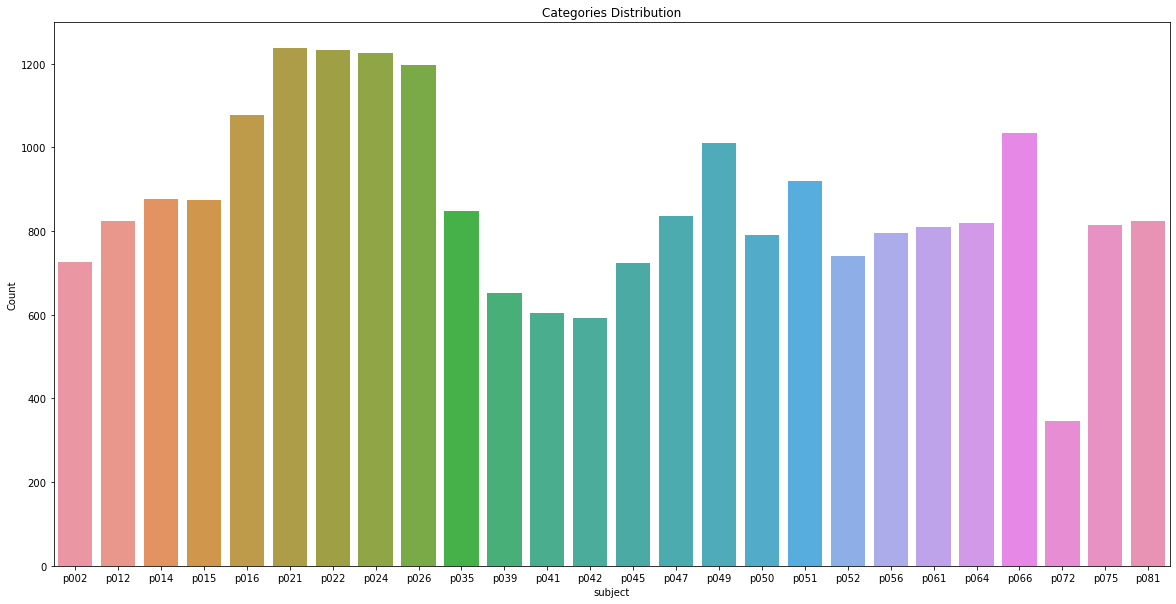

In [6]:
# Plot figure size
plt.figure(figsize = (20,10))
# Count the number of images per category
sns.countplot(x = 'subject', data = df)
# Change the Axis names
plt.ylabel('Count')
plt.title('Categories Distribution')
# Show plot
plt.show()

In [7]:
#/kaggle/input/state-farm-distracted-driver-detection/imgs/train/
df_val = pd.DataFrame(columns=['subject','classname','img'])
df_train = pd.DataFrame(columns=['subject','classname','img'])
for row in df.values:
  if row[0] == 'p041' or row[0] == 'p075' or row[0] == 'p061' or row[0] == 'p056' or row[0] == 'p066':
    df_val = df_val.append({'subject':row[0], 'classname':row[1], 'img':str('/kaggle/input/state-farm-distracted-driver-detection/imgs/train/'+row[1]+'/'+row[2])}, ignore_index=True)
  else:
    df_train = df_train.append({'subject':row[0], 'classname':row[1], 'img':str('/kaggle/input/state-farm-distracted-driver-detection/imgs/train/'+row[1]+'/'+row[2])}, ignore_index=True)

In [8]:
df_train.head()

,subject,classname,img
0,p002,c0,/kaggle/input/state-farm-distracted-driver-det...
1,p002,c0,/kaggle/input/state-farm-distracted-driver-det...
2,p002,c0,/kaggle/input/state-farm-distracted-driver-det...
3,p002,c0,/kaggle/input/state-farm-distracted-driver-det...
4,p002,c0,/kaggle/input/state-farm-distracted-driver-det...


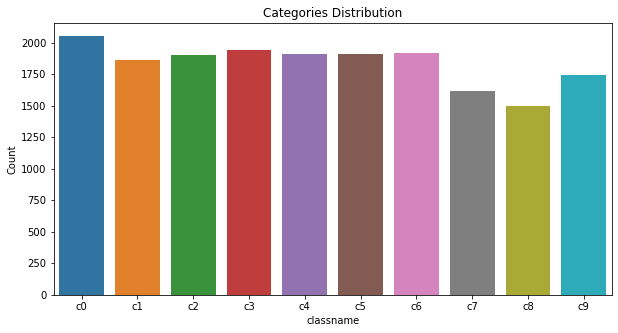

In [9]:
# Plot figure size
plt.figure(figsize = (10,5))
# Count the number of images per category
sns.countplot(x = 'classname', data = df_train)
# Change the Axis names
plt.ylabel('Count')
plt.title('Categories Distribution')
# Show plot
plt.show()

In [10]:
df_val.head()

,subject,classname,img
0,p041,c0,/kaggle/input/state-farm-distracted-driver-det...
1,p041,c0,/kaggle/input/state-farm-distracted-driver-det...
2,p041,c0,/kaggle/input/state-farm-distracted-driver-det...
3,p041,c0,/kaggle/input/state-farm-distracted-driver-det...
4,p041,c0,/kaggle/input/state-farm-distracted-driver-det...


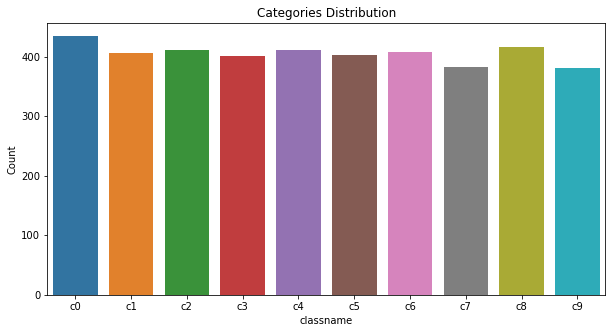

In [11]:
# Plot figure size
plt.figure(figsize = (10,5))
# Count the number of images per category
sns.countplot(x = 'classname', data = df_val)
# Change the Axis names
plt.ylabel('Count')
plt.title('Categories Distribution')
# Show plot
plt.show()

In [12]:
from __future__ import print_function
from __future__ import absolute_import
from __future__ import division

%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
import sys
from glob import glob
from PIL import Image
import matplotlib.pyplot as plt

import warnings

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression

import itertools

import keras
from keras import utils
from keras.utils.np_utils import to_categorical
from keras.models import Sequential, Model
from keras.layers.normalization import BatchNormalization
#from keras.layers import *
from keras import backend as K
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from keras import activations
from keras.regularizers import l2
from keras.engine.topology import get_source_inputs

import tensorflow

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import os
from urllib.request import urlopen,urlretrieve
from PIL import Image
from tqdm import tqdm_notebook
from sklearn.utils import shuffle
import cv2

from keras.models import load_model
from sklearn.datasets import load_files   
from keras.utils import np_utils
from glob import glob
from keras import applications
from keras.preprocessing.image import ImageDataGenerator 
from keras import optimizers
from keras.models import Sequential,Model,load_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D,GlobalAveragePooling2D
from keras.callbacks import TensorBoard,ReduceLROnPlateau,ModelCheckpoint
from keras import applications
from keras_applications.resnet_v2 import ResNet152V2

In [13]:
import time
from tqdm import tqdm
from IPython.display import FileLink
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns 
%matplotlib inline
from IPython.display import display, Image
import matplotlib.image as mpimg
import cv2

In [37]:
train_gen = ImageDataGenerator(#rotation_range=3,
                               #width_shift_range=0.05,
                               #height_shift_range=0.02,
                               #shear_range=0.003,
                               #zoom_range=0.06,
                               #channel_shift_range=0.0,
                               #fill_mode='nearest',
                               #horizontal_flip=False, vertical_flip=False,
                               rescale=1.0/255.0)

train_gene = train_gen.flow_from_dataframe(dataframe = df_train,
                                          directory= None,
                                          target_size=(224, 224),
                                          x_col = 'img',
                                          y_col = 'classname',
                                          color_mode='rgb',
                                          class_mode='categorical',
                                          batch_size=64, shuffle=True,
                                          interpolation='nearest')

val_gen = ImageDataGenerator(#rotation_range=3,
                               #width_shift_range=0.05,
                               #height_shift_range=0.02,
                               #shear_range=0.003,
                               #zoom_range=0.06,
                               #channel_shift_range=0.0,
                               #fill_mode='nearest',
                               #horizontal_flip=False, vertical_flip=False,
                               rescale=1.0/255.0)

val_gene = val_gen.flow_from_dataframe(dataframe = df_val,
                                          directory= None,
                                          target_size=(224, 224),
                                          x_col = 'img',
                                          y_col = 'classname',
                                          color_mode='rgb',
                                          class_mode='categorical',
                                          batch_size=64, shuffle=False,
                                          interpolation='nearest')

Found 18368 validated image filenames belonging to 10 classes.
Found 4056 validated image filenames belonging to 10 classes.


In [38]:
from keras.applications.mobilenet_v2 import MobileNetV2
from keras.preprocessing import image
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras import backend as K
from keras.layers import Input

#model = ResNet50(weights='imagenet')
input_tensor = Input(shape=(224, 224, 3))

base_model = MobileNetV2(input_tensor=input_tensor, weights='imagenet', include_top=True)

In [39]:
# add a global spatial average pooling layer
x = base_model.output
#x = GlobalAveragePooling2D()(x)
# let's add a fully-connected layer
x = Dense(1024, activation='relu')(x)
# and a logistic layer -- let's say we have 10 classes
predictions = Dense(10, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False
    
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

model.summary()

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_4[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
____________________________________________________________________________________________

In [40]:
import tensorflow as tf
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('val_acc')>0.995):
            print("\nReached more than 99.5% validation accuracy so cancelling training!")
            self.model.stop_training = True

callbacks = myCallback()

In [41]:
# Training the Vanilla Model
history = model.fit_generator(train_gene,
                              steps_per_epoch = train_gene.samples // 64,
                              validation_data = val_gene, 
                              validation_steps = val_gene.samples // 64,
                              epochs=10, verbose=1, callbacks = [callbacks])

Epoch 1/10
287/287 [==============================] - 303s 1s/step - loss: 2.0624 - acc: 0.3841 - val_loss: 2.4733 - val_acc: 0.1337
Epoch 2/10
287/287 [==============================] - 294s 1s/step - loss: 1.2553 - acc: 0.6992 - val_loss: 3.9688 - val_acc: 0.1490
Epoch 3/10
287/287 [==============================] - 291s 1s/step - loss: 0.8214 - acc: 0.7992 - val_loss: 7.4269 - val_acc: 0.1556
Epoch 4/10
287/287 [==============================] - 291s 1s/step - loss: 0.6213 - acc: 0.8446 - val_loss: 8.5414 - val_acc: 0.1538
Epoch 5/10
287/287 [==============================] - 290s 1s/step - loss: 0.5067 - acc: 0.8714 - val_loss: 12.5789 - val_acc: 0.1508
Epoch 6/10
287/287 [==============================] - 291s 1s/step - loss: 0.4316 - acc: 0.8883 - val_loss: 5.6077 - val_acc: 0.1465
Epoch 7/10
287/287 [==============================] - 290s 1s/step - loss: 0.3788 - acc: 0.9026 - val_loss: 2.4677 - val_acc: 0.1418
Epoch 8/10
287/287 [==============================] - 295s 1s/step -

In [42]:
for i, layer in enumerate(base_model.layers):
   print(i, layer.name)

0 input_4
1 Conv1_pad
2 Conv1
3 bn_Conv1
4 Conv1_relu
5 expanded_conv_depthwise
6 expanded_conv_depthwise_BN
7 expanded_conv_depthwise_relu
8 expanded_conv_project
9 expanded_conv_project_BN
10 block_1_expand
11 block_1_expand_BN
12 block_1_expand_relu
13 block_1_pad
14 block_1_depthwise
15 block_1_depthwise_BN
16 block_1_depthwise_relu
17 block_1_project
18 block_1_project_BN
19 block_2_expand
20 block_2_expand_BN
21 block_2_expand_relu
22 block_2_depthwise
23 block_2_depthwise_BN
24 block_2_depthwise_relu
25 block_2_project
26 block_2_project_BN
27 block_2_add
28 block_3_expand
29 block_3_expand_BN
30 block_3_expand_relu
31 block_3_pad
32 block_3_depthwise
33 block_3_depthwise_BN
34 block_3_depthwise_relu
35 block_3_project
36 block_3_project_BN
37 block_4_expand
38 block_4_expand_BN
39 block_4_expand_relu
40 block_4_depthwise
41 block_4_depthwise_BN
42 block_4_depthwise_relu
43 block_4_project
44 block_4_project_BN
45 block_4_add
46 block_5_expand
47 block_5_expand_BN
48 block_5_exp

In [43]:
for layer in model.layers[:249]:
   layer.trainable = False
for layer in model.layers[249:]:
   layer.trainable = True

In [44]:
from keras.optimizers import SGD
model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss='categorical_crossentropy', metrics=['acc'])

In [ ]:
# Training the Vanilla Model
history = model.fit_generator(train_gene,
                              steps_per_epoch = train_gene.samples // 64,
                              validation_data = val_gene, 
                              validation_steps = val_gene.samples // 64,
                              epochs=10, verbose=1, callbacks = [callbacks])

Epoch 1/10
287/287 [==============================] - 299s 1s/step - loss: 0.2827 - acc: 0.9229 - val_loss: 4.1884 - val_acc: 0.1416
Epoch 2/10
287/287 [==============================] - 293s 1s/step - loss: 0.2847 - acc: 0.9211 - val_loss: 9.4661 - val_acc: 0.1365
Epoch 3/10
287/287 [==============================] - 293s 1s/step - loss: 0.2840 - acc: 0.9230 - val_loss: 8.1318 - val_acc: 0.1445
Epoch 4/10
287/287 [==============================] - 293s 1s/step - loss: 0.2845 - acc: 0.9214 - val_loss: 12.1148 - val_acc: 0.1443
Epoch 5/10
287/287 [==============================] - 292s 1s/step - loss: 0.2869 - acc: 0.9218 - val_loss: 16.1724 - val_acc: 0.1433
Epoch 6/10
 15/287 [>.............................] - ETA: 1:39 - loss: 0.2991 - acc: 0.9187